In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from collections import Counter
from imblearn.over_sampling import ADASYN
from warnings import filterwarnings
from scipy.stats import zscore

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [3]:
sns.set(style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)
filterwarnings(action = 'ignore')
%matplotlib inline

In [4]:
raw = pd.concat(map(pd.read_csv, ['ufc-master.csv'])) 
df = raw.copy()

In [5]:
display(df.head(), df.describe(), df.shape)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,4064.000000,4063.000000,4054.000000,4896.00000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4441.000000,4539.000000,4539.000000,4539.000000,4529.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.0,877.000000,1328.000000,59.000000,7.0,104.000000,118.000000,142.000000,141.000000,134.000000,140.000000,139.000000,133.000000,137.000000,142.000000,166.000000,44.000000,0.0,61.000000,78.000000,110.000000,93.000000,102.000000,89.000000,87.000000,90.000000,85.000000,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,0.504614,1.251173,0.312506,1.76491,1.726511,10.742443,0.232639,0.014502,0.260417,0.975490,0.960989,0.588848,0.029616,2.880923,178.084669,182.435958,164.803105,0.613154,1.051062,0.013480,27.396408,0.454709,0.517659,1.337388,0.329411,2.530842,2.393587,15.950980,0.552083,0.025735,0.365809,1.468750,1.449551,0.866422,0.047386,4.293709,178.030948,182.619835,165.253472,30.056985,29.518382,0.105392,-0.175449,-0.765931,-1.412786,0.370507,-5.208538,-0.319444,-0.506332,-0.277574,0.018591,-0.251172,0.329044,-3.539160,-0.061050,-0.201570,0.138480,1.0,8.262258,6.834337,6.677966,0.0,6.826923,7.050847,6.774648,6.673759,7.649254,6.807143,7.093525,6.827068,6.985401,6.457746,6.789157,7.795455,NaN,7.803279,8.192308,8.490909,8.268817,8.745098,8.179775,8.126437,8.022222,8.388235,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944

(4896, 119)

In [6]:
print(f'Features before transformation:\n\n {df.columns}\n')
df.columns = df.columns.str.strip()
df.rename(columns = lambda x: x.lower(), inplace = True) 
print(f'Features after transformation:\n\n {df.columns}')

Features before transformation:

 Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)

Features after transformation:

 Index(['r_fighter', 'b_fighter', 'r_odds', 'b_odds', 'r_ev', 'b_ev', 'date',
       'location', 'country', 'winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)


In [7]:
df[[f for f in df.columns if df[f].dtype =='O']].head() # Categorical variables in the dataset

,r_fighter,b_fighter,date,location,country,winner,weight_class,gender,b_stance,r_stance,better_rank,finish,finish_details,finish_round_time
0,Thiago Santos,Johnny Walker,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,Light Heavyweight,MALE,Orthodox,Orthodox,Red,U-DEC,NaN,5:00
1,Alex Oliveira,Niko Price,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,Welterweight,MALE,Orthodox,Orthodox,neither,U-DEC,NaN,5:00
2,Misha Cirkunov,Krzysztof Jotko,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,Middleweight,MALE,Southpaw,Orthodox,neither,S-DEC,NaN,5:00
3,Alexander Hernandez,Mike Breeden,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,Lightweight,MALE,Orthodox,Orthodox,neither,KO/TKO,Punch,1:20
4,Joe Solecki,Jared Gordon,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,Lightweight,MALE,Orthodox,Orthodox,neither,S-DEC,NaN,5:00


In [8]:
for f in df.columns:
    if df[f].dtype == 'O':
        df[f] = df[f].str.strip()
        print(f'The unique values for {f} variable: {df[f].unique()}\n')

The unique values for r_fighter variable: ['Thiago Santos' 'Alex Oliveira' 'Misha Cirkunov' ... 'Caol Uno'
 'Eliot Marshall' 'Eric Schafer']

The unique values for b_fighter variable: ['Johnny Walker' 'Niko Price' 'Krzysztof Jotko' ... 'James Irvin'
 'Shannon Gugerty' 'Chase Gormley']

The unique values for date variable: ['2021-10-02' '2021-09-25' '2021-09-18' '2021-09-04' '2021-08-28'
 '8/21/2021' '8/7/2021' '7/31/2021' '7/24/2021' '7/17/2021' '7/10/2021'
 '6/26/2021' '6/19/2021' '6/12/2021' '6/5/2021' '5/22/2021' '5/15/2021'
 '5/8/2021' '5/1/2021' '4/24/2021' '4/17/2021' '4/10/2021' '3/27/2021'
 '3/20/2021' '3/13/2021' '3/6/2021' '2/27/2021' '2/20/2021' '2/13/2021'
 '2/6/2021' '1/23/2021' '1/20/2021' '1/16/2021' '12/19/2020' '12/12/2020'
 '12/5/2020' '11/28/2020' '11/21/2020' '11/14/2020' '11/7/2020'
 '10/31/2020' '10/24/2020' '10/17/2020' '10/10/2020' '10/3/2020'
 '9/26/2020' '9/19/2020' '9/12/2020' '9/5/2020' '8/29/2020' '8/22/2020'
 '8/15/2020' '8/8/2020' '8/1/2020' '7/25/2020' '

In [9]:
df.duplicated().sum() # No duplicate rows

0

In [10]:
'''
Let's keep the most significant features
'''
insig_feat = ['weight_class', 'gender',  'location', 'country', 'lose_streak_dif', 'empty_arena', 
              'constant_1', 'title_bout', 'no_of_rounds', 'b_reach_cms', 'r_reach_cms', 
              'total_round_dif', 'total_title_bout_dif', 'finish_round_time',
              
              'b_stance', 'b_current_lose_streak', 'b_draw', 'b_total_rounds_fought', 'b_total_title_bouts',
              'b_win_by_decision_majority', 'b_win_by_tko_doctor_stoppage', 'b_weight_lbs',
              'b_match_weightclass_rank', 'b_women\'s flyweight_rank', 'b_women\'s featherweight_rank',
              'b_women\'s strawweight_rank', 'b_women\'s bantamweight_rank', 'b_heavyweight_rank',
              'b_light heavyweight_rank', 'b_middleweight_rank', 'b_welterweight_rank',
              'b_lightweight_rank', 'b_featherweight_rank', 'b_bantamweight_rank', 'b_flyweight_rank',
              'b_pound-for-pound_rank', 'r_ev', 'b_ev',
              
              'r_stance', 'r_current_lose_streak', 'r_draw', 'r_total_rounds_fought', 'r_total_title_bouts',
              'r_win_by_decision_majority', 'r_win_by_tko_doctor_stoppage', 'r_weight_lbs', 
              'r_match_weightclass_rank', 'r_women\'s flyweight_rank', 'r_women\'s featherweight_rank',
              'r_women\'s strawweight_rank', 'r_women\'s bantamweight_rank', 'r_heavyweight_rank',
              'r_light heavyweight_rank', 'r_middleweight_rank', 'r_welterweight_rank',
              'r_lightweight_rank', 'r_featherweight_rank', 'r_bantamweight_rank', 'r_flyweight_rank',
              'r_pound-for-pound_rank'
             ]

In [11]:
later_used = ['win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif', 
              'ko_dif', 'sub_dif', 'height_dif', 'age_dif', 'sig_str_dif', 'avg_sub_att_dif',
              'avg_td_dif', 'finish', 'finish_details', 'finish_round', 
              'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds',
             'total_fight_time_secs']

In [12]:
df[[f for f in df.columns if df[f].dtype =='float64' or df[f].dtype =='int64']].head()

,r_odds,b_odds,r_ev,b_ev,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_total_rounds_fought,b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_total_rounds_fought,r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_height_cms,r_reach_cms,r_weight_lbs,r_age,b_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,b_match_weightclass_rank,r_match_weightclass_rank,r_women's flyweight_rank,r_women's featherweight_rank,r_women's strawweight_rank,r_women's bantamweight_rank,r_heavyweight_rank,r_light heavyweight_rank,r_middleweight_rank,r_welterweight_rank,r_lightweight_rank,r_featherweight_rank,r_bantamweight_rank,r_flyweight_rank,r_pound-for-pound_rank,b_women's flyweight_rank,b_women's featherweight_rank,b_women's strawweight_rank,b_women's bantamweight_rank,b_heavyweight_rank,b_light heavyweight_rank,b_middleweight_rank,b_welterweight_rank,b_lightweight_rank,b_featherweight_rank,b_bantamweight_rank,b_flyweight_rank,b_pound-for-pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,-150.0,130,66.666667,130.000000,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,170.0,-200,170.000000,50.000000,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,110.0,-130,110.000000,76.923077,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,-675.0,475,14.814815,475.000000,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,-135.0,115,74.074074,115.000000,3,0,2,0,5.22,0.56,0.0,2.54,0.39,2,3,19,0,0,0,4,1,0,0,5,175.26,172.72,145,0,4,0,2.64,0.62,0.6,2.85,0.52,4,0,8,0,0,0,2,0,2,0,4,175.26,177.80,155,28,33,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.58,-0.6,-0.31,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


In [13]:
df.drop(labels = insig_feat+later_used, axis=1, inplace=True) 

In [14]:
print(f'Remaining features: {df.shape[1]}')

Remaining features: 38


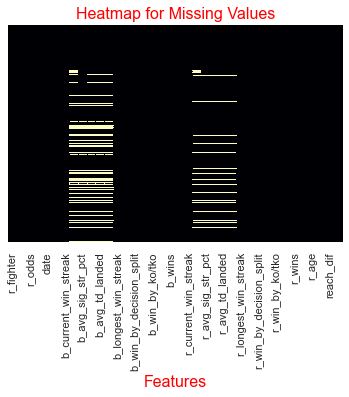

In [15]:
sns.heatmap(data = df.isna(), yticklabels = False, cbar = False, cmap = plt.cm.magma)
plt.title(label = 'Heatmap for Missing Values', fontsize = 16, color='red')
plt.xlabel(xlabel = 'Features', fontsize = 16, color='red')
plt.show()

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.sort_values('date', ascending=False).tail()

,r_fighter,b_fighter,r_odds,b_odds,date,winner,b_current_win_streak,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_wins,b_height_cms,r_current_win_streak,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_wins,r_height_cms,r_age,b_age,reach_dif,better_rank
4891,Duane Ludwig,Darren Elkins,-155.0,135,2010-03-21,Blue,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,177.80,0,13.666667,0.576667,0.000000,0.000000,0.000,2,1,0,1,1,0,2,177.80,31,25,2.54,neither
4892,John Howard,Daniel Roberts,-210.0,175,2010-03-21,Red,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,177.80,3,18.000000,0.550000,1.000000,4.666667,0.790,3,0,2,0,1,0,3,170.18,27,29,7.62,neither
4893,Brendan Schaub,Chase Gormley,-260.0,220,2010-03-21,Red,0,8.000000,0.34,1.000000,1.000000,1.0,0,1,0,0,0,0,0,190.50,0,12.000000,0.250000,0.000000,0.000000,0.000,0,1,0,0,0,0,0,193.04,27,27,-2.12,neither
4894,Mike Pierce,Julio Paulino,-420.0,335,2010-03-21,Red,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,182.88,0,40.500000,0.405000,0.000000,3.500000,0.520,1,1,0,1,0,0,1,172.72,29,34,7.62,neither
4895,Eric Schafer,Jason Brilz,140.0,-160,2010-03-21,Blue,0,31.666667,0.46,0.666667,1.666667,0.5,2,1,0,1,1,0,2,180.34,0,15.666667,0.588333,1.333333,0.833333,0.145,2,3,0,0,1,2,3,190.50,32,34,-10.16,neither


In [18]:
''' Missing values 
'''
for column in df.columns:
    n_missing = df[column].isnull().sum()
    ratio = n_missing / df.shape[0]
    if ratio!=0:
        print(f'For column {column}: {ratio:.2%}')

For column r_odds: 0.02%
For column b_avg_sig_str_landed: 19.00%
For column b_avg_sig_str_pct: 15.62%
For column b_avg_sub_att: 16.99%
For column b_avg_td_landed: 17.01%
For column b_avg_td_pct: 17.20%
For column r_avg_sig_str_landed: 9.29%
For column r_avg_sig_str_pct: 7.29%
For column r_avg_sub_att: 7.29%
For column r_avg_td_landed: 7.29%
For column r_avg_td_pct: 7.50%


In [19]:
df_numeric = df[[f for f in df.columns if df[f].dtype =='float64' or df[f].dtype =='int64' and f!='target']]
df_categoric = df[[f for f in df.columns if df[f].dtype =='O' and f!='r_fighter' and f!='b_fighter']]
df_date = df['date']
df_rb = df[['r_fighter', 'b_fighter']]

In [20]:
display(df_numeric, df_categoric)

,r_odds,b_odds,b_current_win_streak,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_wins,b_height_cms,r_current_win_streak,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_wins,r_height_cms,r_age,b_age,reach_dif
0,-150.0,130,1,3.420000,0.59,0.700000,0.240000,1.00,4,2,0,1,4,0,5,198.12,0,3.950000,0.480000,0.100000,0.610000,0.360,4,8,0,2,11,0,13,187.96,37,29,15.24
1,170.0,-200,0,5.160000,0.42,0.800000,0.790000,0.22,2,5,0,0,4,2,6,182.88,0,2.970000,0.510000,0.500000,2.270000,0.370,4,8,1,3,4,3,11,180.34,33,32,0.00
2,110.0,-130,0,2.920000,0.41,0.100000,1.150000,0.34,5,5,2,6,1,0,9,185.42,0,3.770000,0.490000,1.700000,4.480000,0.440,4,4,0,0,1,5,6,190.50,34,32,0.00
3,-675.0,475,0,4.040000,0.34,0.000000,0.000000,0.00,0,1,0,0,0,0,0,177.80,0,3.790000,0.360000,0.000000,1.570000,0.350,2,3,0,2,2,0,4,175.26,29,32,-5.08
4,-135.0,115,2,5.220000,0.56,0.000000,2.540000,0.39,2,3,0,4,1,0,5,175.26,4,2.640000,0.620000,0.600000,2.850000,0.520,4,0,0,2,0,2,4,175.26,28,33,-5.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,-155.0,135,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,177.80,0,13.666667,0.576667,0.000000,0.000000,0.000,2,1,0,1,1,0,2,177.80,31,25,2.54
4892,-210.0,175,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,177.80,3,18.000000,0.550000,1.000000,4.666667,0.790,3,0,2,0,1,0,3,170.18,27,29,7.62
4893,-260.0,220,0,8.000000,0.34,1.000000,1.000000,1.00,0,1,0,0,0,0,0,190.50,0,12.000000,0.250000,0.000000,0.000000,0.000,0,1,0,0,0,0,0,193.04,27,27,-2.12
4894,-420.0,335,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,182.88,0,40.500000,0.405000,0.000000,3.500000,0.520,1,1,0,1,0,0,1,172.72,29,34,7.62


,winner,better_rank
0,Red,Red
1,Blue,neither
2,Blue,neither
3,Red,neither
4,Blue,neither
...,...,...
4891,Blue,neither
4892,Red,neither
4893,Red,neither
4894,Red,neither


In [21]:
for f in df_categoric.columns:
    le = LabelEncoder()
    df_categoric[f] = le.fit_transform(df_categoric[f])

In [22]:
for f in df_numeric.columns:
    df_numeric[f].fillna(value=df_numeric[f].mean(), inplace=True)

In [23]:
df = pd.concat([df_date, df_rb, df_numeric, df_categoric], axis=1)

In [24]:
df.head()

,date,r_fighter,b_fighter,r_odds,b_odds,b_current_win_streak,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_wins,b_height_cms,r_current_win_streak,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_wins,r_height_cms,r_age,b_age,reach_dif,winner,better_rank
0,2021-10-02,Thiago Santos,Johnny Walker,-150.0,130,1,3.42,0.59,0.7,0.24,1.00,4,2,0,1,4,0,5,198.12,0,3.95,0.48,0.1,0.61,0.36,4,8,0,2,11,0,13,187.96,37,29,15.24,1,1
1,2021-10-02,Alex Oliveira,Niko Price,170.0,-200,0,5.16,0.42,0.8,0.79,0.22,2,5,0,0,4,2,6,182.88,0,2.97,0.51,0.5,2.27,0.37,4,8,1,3,4,3,11,180.34,33,32,0.00,0,2
2,2021-10-02,Misha Cirkunov,Krzysztof Jotko,110.0,-130,0,2.92,0.41,0.1,1.15,0.34,5,5,2,6,1,0,9,185.42,0,3.77,0.49,1.7,4.48,0.44,4,4,0,0,1,5,6,190.50,34,32,0.00,0,2
3,2021-10-02,Alexander Hernandez,Mike Breeden,-675.0,475,0,4.04,0.34,0.0,0.00,0.00,0,1,0,0,0,0,0,177.80,0,3.79,0.36,0.0,1.57,0.35,2,3,0,2,2,0,4,175.26,29,32,-5.08,1,2
4,2021-10-02,Joe Solecki,Jared Gordon,-135.0,115,2,5.22,0.56,0.0,2.54,0.39,2,3,0,4,1,0,5,175.26,4,2.64,0.62,0.6,2.85,0.52,4,0,0,2,0,2,4,175.26,28,33,-5.08,0,2


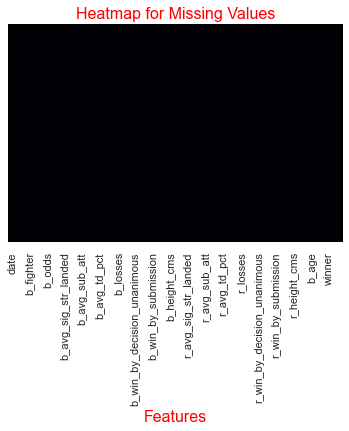

In [25]:
'''Visual recheck of the
missing values'''
sns.heatmap(data = df.isna(), yticklabels = False, cbar = False, cmap = plt.cm.magma)
plt.title(label = 'Heatmap for Missing Values', fontsize = 16, color='red')
plt.xlabel(xlabel = 'Features', fontsize = 16, color='red')
plt.show()

In [26]:
'''Converting American odds 
to decimal odds'''

df['r_odds'] = df['r_odds'].apply(lambda x: round(x/100+1,2) if x>0 else round(100/abs(x)+1,2))
df['b_odds'] = df['b_odds'].apply(lambda x: round(x/100+1,2) if x>0 else round(100/abs(x)+1,2))

In [27]:
df[['r_odds', 'b_odds']].head()

,r_odds,b_odds
0,1.67,2.30
1,2.70,1.50
2,2.10,1.77
3,1.15,5.75
4,1.74,2.15


In [28]:
SOME_NUMERIC_FEATURES = ['b_avg_sig_str_landed', 'b_avg_sig_str_pct', 'b_avg_sub_att', 
                         'b_avg_td_landed', 'b_avg_td_pct', 'b_height_cms',
                        'r_avg_sig_str_landed', 'r_avg_sig_str_pct', 'r_avg_sub_att', 
                         'r_avg_td_landed','r_avg_td_pct', 'r_height_cms', 'r_age',
                         'b_age', 'reach_dif']
SOME_NUMERIC_FEATURES = [f for f in df.columns if df[f].dtype=='int64' or df[f].dtype=='float64'
                        and f!='winner' and f!='better_rank']
print(f'The total number of rows that contain outliers before: {df.loc[(abs(zscore(df[SOME_NUMERIC_FEATURES])) > 3).any(axis = 1)].shape[0]}')

The total number of rows that contain outliers before: 1705


In [29]:
'''Coercing outliers via IQR''' 

def impute_outliers(value):
    if value > upperlimit:
        value = upperlimit
    elif value < lowerlimit:
        value = lowerlimit
    return value

for feature in SOME_NUMERIC_FEATURES:
    Q3 = df[feature].quantile(q = 0.75)
    Q1 = df[feature].quantile(q = 0.25)
    IQR = Q3 - Q1
    outlier_range = IQR * 1.7
    upperlimit = Q3 + outlier_range
    lowerlimit = Q1 - outlier_range
    df[feature] = df[feature].apply(impute_outliers)
    
while df.loc[(abs(zscore(df[SOME_NUMERIC_FEATURES])) > 3).any(axis = 1)].shape[0] != 0:
    df.drop(index = df.loc[(abs(zscore(df[SOME_NUMERIC_FEATURES])) > 3).any(axis = 1)].index, inplace = True)    
print(f'The total number of rows that contain outliers now: {df.loc[(abs(zscore(df[SOME_NUMERIC_FEATURES])) > 3).any(axis = 1)].shape[0]}')

The total number of rows that contain outliers now: 0


In [30]:
df['reach_dif'] = abs(df['reach_dif'])

In [31]:
df['favourite'] = df['r_odds'] < df['b_odds'] 
df['favourite'] = df['favourite'].astype('int64') # From boolean to integer

In [32]:
'''bet_correct becomes our
target variable'''

df['bet_correct'] = df['winner'] == df['favourite']
df['bet_correct'] = df['bet_correct'].astype(int)
bets = df[['winner', 'favourite', 'bet_correct']]
accuracy = bets['bet_correct'].sum() 
print(f'The rate of favourite fighter coming on top throughout the UFC history: {accuracy / len(df)}')  

The rate of favourite fighter coming on top throughout the UFC history: 0.6658227848101266


In [33]:
scalable_feat = ['b_avg_sig_str_landed', 'b_avg_sig_str_pct', 'b_avg_sub_att', 
                         'b_avg_td_landed', 'b_avg_td_pct', 'b_height_cms',
                        'r_avg_sig_str_landed', 'r_avg_sig_str_pct', 'r_avg_sub_att', 
                         'r_avg_td_landed','r_avg_td_pct', 'r_height_cms', 'r_age',
                         'b_age', 'reach_dif', 'r_odds', 'b_odds']

In [34]:
df.drop(['winner', 'date', 'r_fighter', 'b_fighter'], axis=1, inplace=True)

In [35]:
'''Scaling numeric features. Robust Scaler 
was the one with the highest result'''

scaler = RobustScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])  
df = pd.DataFrame(df)

In [36]:
X = df[[f for f in df.columns[:-1]]]
y = df.drop(df[[f for f in df.columns[:-1]]], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15,
                                                    stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((335, 35), (335, 1), (60, 35), (60, 1))

In [38]:
oversampling = ADASYN(sampling_strategy = 0.95, random_state = 123)
X_resampled, Y_resampled = oversampling.fit_resample(X_train, y_train)

In [39]:
log_reg = LogisticRegression(max_iter = 10000)
log_model = log_reg.fit(X_train, y_train.values.ravel())

In [40]:
y_pred = log_reg.predict(X_test)

In [41]:
log_reg.score(X_train,y_train)

0.6895522388059702

In [42]:
log_reg.score(X_test,y_test)

0.7166666666666667

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        20
           1       0.70      1.00      0.82        40

    accuracy                           0.72        60
   macro avg       0.85      0.57      0.54        60
weighted avg       0.80      0.72      0.64        60



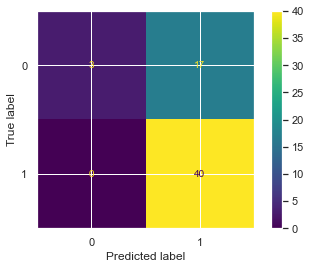

In [44]:
plot_confusion_matrix(log_model, X_test, y_test)
plt.show()

In [46]:
rid = Lasso()
log_model = rid.fit(X_train, y_train)

In [47]:
y_pred = rid.predict(X_test)
rid.score(X_train,y_train)

0.0

In [48]:
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=244,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[22:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
model.score(X_train,y_train)

1.0

In [50]:
model.score(X_test,y_test)

0.6833333333333333

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54        20
           1       0.77      0.75      0.76        40

    accuracy                           0.68        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.69      0.68      0.69        60



In [ ]:
'''Multicollinearity and low variance'''
sns.heatmap(data = df_numeric.corr(), yticklabels = False, cbar = False, cmap = plt.cm.magma)
plt.title(label = 'Heatmap of Correlation', fontsize = 16, color='green')
plt.xlabel(xlabel = 'Features', fontsize = 16, color='green')
plt.show()

In [ ]:
'''Cross validation'''

In [ ]:
df = df.drop(['r_fighter', 'b_fighter'], axis = 1)

In [ ]:
'''More feature engineering'''